In [1]:
# Pull from the API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # for the sake of the project I limited it to the top 15
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This enables me to see all the columns & rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# normalizing data

df = pd.json_normalize(data['data'])

# adding timestamp (for future use to check if the API Pull was performed successfully)

df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.944328e+07,1.944328e+07,False,NaN,1,NaN,NaN,None,2023-07-30T18:04:00.000Z,29399.507096,6.866360e+09,-0.1819,0.084459,0.237356,-2.339962,-3.557350,8.672030,3.962328,5.716229e+11,48.1286,6.173896e+11,None,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:06:43.112886+00:00
1,1027,Ethereum,ETH,ethereum,7196,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201811e+08,1.201811e+08,True,NaN,2,NaN,NaN,None,2023-07-30T18:04:00.000Z,1878.444177,2.962572e+09,24.8981,0.115050,0.068552,-0.777638,-3.106045,0.664718,2.111077,2.257535e+11,19.0082,2.257535e+11,None,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:06:43.112886+00:00
2,825,Tether USDt,USDT,tether,58030,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.382469e+10,8.670626e+10,True,NaN,3,NaN,NaN,None,2023-07-30T18:04:00.000Z,0.999999,1.327735e+10,12.5411,-0.006178,0.001148,-0.036547,0.010978,-0.009463,0.006518,8.382462e+10,7.0579,8.670619e+10,None,2023-07-30T18:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-30 18:06:43.112886+00:00
3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.269385e+10,9.998856e+10,False,NaN,4,NaN,NaN,None,2023-07-30T18:04:00.000Z,0.717029,1.081580e+09,54.6380,0.081816,0.736732,-4.130157,50.955189,40.841377,56.078123,3.778303e+10,3.1813,7.170292e+10,None,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:06:43.112886+00:00
4,1839,BNB,BNB,bnb,1546,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538555e+08,1.538555e+08,False,NaN,5,NaN,NaN,None,2023-07-30T18:04:00.000Z,243.757602,4.218768e+08,43.4390,0.136724,0.666650,0.012293,1.014555,-20.483722,-26.100801,3.750344e+10,3.1578,3.750344e+10,None,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:06:43.112886+00:00
5,3408,USD Coin,USDC,usd-coin,13477,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.654885e+10,2.654885e+10,False,NaN,6,NaN,NaN,None,2023-07-30T18:04:00.000Z,1.000048,1.600064e+09,-1.4484,-0.002661,0.000660,-0.016850,-0.027949,0.017160,0.025317,2.655013e+10,2.2355,2.655013e+10,None,2023-07-30T18:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-30 18:06:43.112886+00:00
6,74,Dogecoin,DOGE,dogecoin,757,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.403870e+11,1.403870e+11,True,NaN,7,NaN,NaN,None,2023-07-30T18:04:00.000Z,0.079700,5.230843e+08,78.9420,0.470855,1.092242,9.558731,20.459452,11.327402,1.487171,1.118878e+10,0.9421,1.118878e+10,None,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:06:43.112886+00:00
7,2010,Cardano,ADA,cardano,884,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.500731e+10,3.603028e+10,False,NaN,8,NaN,NaN,None,2023-07-30T18:04:00.000Z,0.315084,1.597826e+08,13.8399,0.301939,0.840797,-0.879754,9.702694,-15.941502,-18.414374,1.103026e+10,0.9288,1.417880e+10,None,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:06:43.112886+00:00
8,5426,Solana,SOL,solana,494,2020-04-10T00:00:00.000Z,"[pos, platform, so

In [5]:
# creating the function

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    
# combining data from a JSON object (nested data) into a flat pandas DataFrame (df) with a new column 'Timestamp'

    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    if not os.path.isfile(r'C:\Users\kemal\Google Drive\Python_Scripts\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\kemal\Google Drive\Python_Scripts\CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\kemal\Google Drive\Python_Scripts\CryptoAPI.csv', mode='a', header=False)

In [6]:
# Automating python script 

import os 
from time import time
from time import sleep

for i in range(333): # 333 is the max range per day
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [7]:
# Checking the file if the data was pulled in

df99 = pd.read_csv(r'C:\Users\kemal\Google Drive\Python_Scripts\CryptoAPI.csv')
df99

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.944328e+07,1.944328e+07,False,NaN,1,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,29399.507096,6.866360e+09,-0.1819,0.084459,0.237356,-2.339962,-3.557350,8.672030,3.962328,5.716229e+11,48.1286,6.173896e+11,NaN,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:05:47.459688
1,1,1027,Ethereum,ETH,ethereum,7196,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201811e+08,1.201811e+08,True,NaN,2,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,1878.444177,2.962572e+09,24.8981,0.115050,0.068552,-0.777638,-3.106045,0.664718,2.111077,2.257535e+11,19.0082,2.257535e+11,NaN,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:05:47.459688
2,2,825,Tether USDt,USDT,tether,58030,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.382469e+10,8.670626e+10,True,NaN,3,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,0.999999,1.327735e+10,12.5411,-0.006178,0.001148,-0.036547,0.010978,-0.009463,0.006518,8.382462e+10,7.0579,8.670619e+10,NaN,2023-07-30T18:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-30 18:05:47.459688
3,3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.269385e+10,9.998856e+10,False,NaN,4,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,0.717029,1.081580e+09,54.6380,0.081816,0.736732,-4.130157,50.955189,40.841377,56.078123,3.778303e+10,3.1813,7.170292e+10,NaN,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:05:47.459688
4,4,1839,BNB,BNB,bnb,1546,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538555e+08,1.538555e+08,False,NaN,5,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,243.757602,4.218768e+08,43.4390,0.136724,0.666650,0.012293,1.014555,-20.483722,-26.100801,3.750344e+10,3.1578,3.750344e+10,NaN,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:05:47.459688
5,5,3408,USD Coin,USDC,usd-coin,13477,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.654885e+10,2.654885e+10,False,NaN,6,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,1.000048,1.600064e+09,-1.4484,-0.002661,0.000660,-0.016850,-0.027949,0.017160,0.025317,2.655013e+10,2.2355,2.655013e+10,NaN,2023-07-30T18:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-30 18:05:47.459688
6,6,74,Dogecoin,DOGE,dogecoin,757,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.403870e+11,1.403870e+11,True,NaN,7,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,0.079700,5.230843e+08,78.9420,0.470855,1.092242,9.558731,20.459452,11.327402,1.487171,1.118878e+10,0.9421,1.118878e+10,NaN,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:05:47.459688
7,7,2010,Cardano,ADA,cardano,884,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.500731e+10,3.603028e+10,False,NaN,8,NaN,NaN,NaN,2023-07-30T18:04:00.000Z,0.315084,1.597826e+08,13.8399,0.301939,0.840797,-0.879754,9.702694,-15.941502,-18.414374,1.103026e+10,0.9288,1.417880e+10,NaN,2023-07-30T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-30 18:05:47.459688
8,8,5426,Solana,SOL,solana,494,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",Na

In [9]:
# Grouping By Name to see avg percent changes of crypto value

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.045977,0.235778,-2.470640,-3.579601,8.619769,3.986704
Ethereum,0.072779,0.071815,-0.923181,-3.235672,0.648373,2.176355
Tether USDt,-0.011375,-0.009018,-0.020822,0.003328,-0.033824,-0.012697
XRP,0.021699,0.757641,-4.108632,51.109481,40.944819,56.030016
BNB,0.098741,0.699254,0.043942,1.015790,-20.477087,-26.087526
USD Coin,-0.010873,-0.006731,-0.022122,-0.042334,-0.009438,0.010279
Dogecoin,0.379534,1.148027,9.636359,20.452820,11.321094,1.440455
Cardano,0.244756,0.886056,-0.830749,9.755586,-15.939210,-18.391656
Solana,0.129316,-1.095228,-0.567924,27.768553,20.669846,13.735694


In [10]:
# stacking values

df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h       0.045977
              quote.USD.percent_change_24h      0.235778
              quote.USD.percent_change_7d      -2.470640
              quote.USD.percent_change_30d     -3.579601
              quote.USD.percent_change_60d      8.619769
              quote.USD.percent_change_90d      3.986704
Ethereum      quote.USD.percent_change_1h       0.072779
              quote.USD.percent_change_24h      0.071815
              quote.USD.percent_change_7d      -0.923181
              quote.USD.percent_change_30d     -3.235672
              quote.USD.percent_change_60d      0.648373
              quote.USD.percent_change_90d      2.176355
Tether USDt   quote.USD.percent_change_1h      -0.011375
              quote.USD.percent_change_24h     -0.009018
              quote.USD.percent_change_7d      -0.020822
              quote.USD.percent_change_30d      0.003328
              quote.USD.percent_change_60d   

In [11]:
type(df4)

pandas.core.series.Series

In [13]:
# formatting it into DataFrame

df5 = df4.to_frame(name='values')
df5

values
name                                                 
Bitcoin      quote.USD.percent_change_1h     0.045977
             quote.USD.percent_change_24h    0.235778
             quote.USD.percent_change_7d    -2.470640
             quote.USD.percent_change_30d   -3.579601
             quote.USD.percent_change_60d    8.619769
             quote.USD.percent_change_90d    3.986704
Ethereum     quote.USD.percent_change_1h     0.072779
             quote.USD.percent_change_24h    0.071815
             quote.USD.percent_change_7d    -0.923181
             quote.USD.percent_change_30d   -3.235672
             quote.USD.percent_change_60d    0.648373
             quote.USD.percent_change_90d    2.176355
Tether USDt  quote.USD.percent_change_1h    -0.011375
             quote.USD.percent_change_24h   -0.009018
             quote.USD.percent_change_7d    -0.020822
             quote.USD.percent_change_30d    0.003328
             quote.USD.percent_change_60d   -0.033824
             quote.USD.percent_change_90d   -0.012697
XRP          quote.USD.percent_change_1h     0.021699
             quote.USD.percent_change_24h    0.757641
             quote.USD.percent_change_7d    -4.108632
             quote.USD.percent_change_30d   51.109481
             quote.USD.percent_change_60d   40.944819
             quote.USD.percent_change_90d   56.030016
BNB          quote.USD.percent_change_1h     0.098741
             quote.USD.percent_change_24h    0.699254
             quote.USD.percent_change_7d     0.043942
             quote.USD.percent_change_30d    1.015790
             quote.USD.percent_change_60d  -20.477087
             quote.USD.percent_change_90d  -26.087526
USD Coin     quote.USD.percent_change_1h    -0.010873
             quote.USD.percent_change_24h   -0.006731
             quote.USD.percent_change_7d    -0.022122
             quote.USD.percent_change_30d   -0.042334
             quote.USD.percent_change_60d   -0.009438
             quote.USD.percent_change_90d    0.010279
Dogecoin     quote.USD.percent_change_1h     0.379534
             quote.USD.percent_change_24h    1.148027
             quote.USD.percent_change_7d     9.636359
             quote.USD.percent_change_30d   20.452820
             quote.USD.percent_change_60d   11.321094
             quote.USD.percent_change_90d    1.440455
Cardano      quote.USD.percent_change_1h     0.244756
             quote.USD.percent_change_24h    0.886056
             quote.USD.percent_change_7d    -0.830749
             quote.USD.percent_change_30d    9.755586
             quote.USD.percent_change_60d  -15.939210
             quote.USD.percent_change_90d  -18.391656
Solana       quote.USD.percent_change_1h     0.129316
             quote.USD.percent_change_24h   -1.095228
             quote.USD.percent_change_7d    -0.567924
             quote.USD.percent_change_30d   27.768553
             quote.USD.percent_change_60d   20.669846
             quote.USD.percent_change_90d   13.735694
TRON         quote.USD.percent_change_1h    -0.018686
             quote.USD.percent_change_24h   -3.077631
             quote.USD.percent_change_7d    -2.946244
             quote.USD.percent_change_30d    6.951106
             quote.USD.percent_change_60d    7.148963
             quote.USD.percent_change_90d   18.895337
Litecoin     quote.USD.percent_change_1h    -0.540998
             quote.USD.percent_change_24h    4.229160
             quote.USD.percent_change_7d     2.440302
             quote.USD.percent_change_30d  -11.873200
             quote.USD.percent_change_60d    6.350374
             quote.USD.percent_change_90d    9.458668
Polygon      quote.USD.percent_change_1h     0.093135
             quote.USD.percent_change_24h   -1.427118
             quote.USD.percent_change_7d    -7.054425
             quote.USD.percent_change_30d    8.040461
             quote.USD.percent_change_60d  -20.102460
             quote.USD.percent_change_90d  -26.549506
Polkadot     quote.USD.percent_change_1h     0.0735

In [15]:
# setting an index

index = pd.Index(range(90))

# Set the above DataFrame index object as the index using set_index() function
df6 = df5.reset_index() 
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.045977
1,Bitcoin,quote.USD.percent_change_24h,0.235778
2,Bitcoin,quote.USD.percent_change_7d,-2.470640
3,Bitcoin,quote.USD.percent_change_30d,-3.579601
4,Bitcoin,quote.USD.percent_change_60d,8.619769
5,Bitcoin,quote.USD.percent_change_90d,3.986704
6,Ethereum,quote.USD.percent_change_1h,0.072779
7,Ethereum,quote.USD.percent_change_24h,0.071815
8,Ethereum,quote.USD.percent_change_7d,-0.923181
9,Ethereum,quote.USD.percent_change_30d,-3.235672


In [16]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.045977
1,Bitcoin,quote.USD.percent_change_24h,0.235778
2,Bitcoin,quote.USD.percent_change_7d,-2.470640
3,Bitcoin,quote.USD.percent_change_30d,-3.579601
4,Bitcoin,quote.USD.percent_change_60d,8.619769
5,Bitcoin,quote.USD.percent_change_90d,3.986704
6,Ethereum,quote.USD.percent_change_1h,0.072779
7,Ethereum,quote.USD.percent_change_24h,0.071815
8,Ethereum,quote.USD.percent_change_7d,-0.923181
9,Ethereum,quote.USD.percent_change_30d,-3.235672


In [18]:
# Replacing percent change description names

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.045977
1,Bitcoin,24h,0.235778
2,Bitcoin,7d,-2.470640
3,Bitcoin,30d,-3.579601
4,Bitcoin,60d,8.619769
5,Bitcoin,90d,3.986704
6,Ethereum,1h,0.072779
7,Ethereum,24h,0.071815
8,Ethereum,7d,-0.923181
9,Ethereum,30d,-3.235672


In [19]:
# import seaborn and matplotlib for visualization

import seaborn as sns
import matplotlib.pyplot as plt

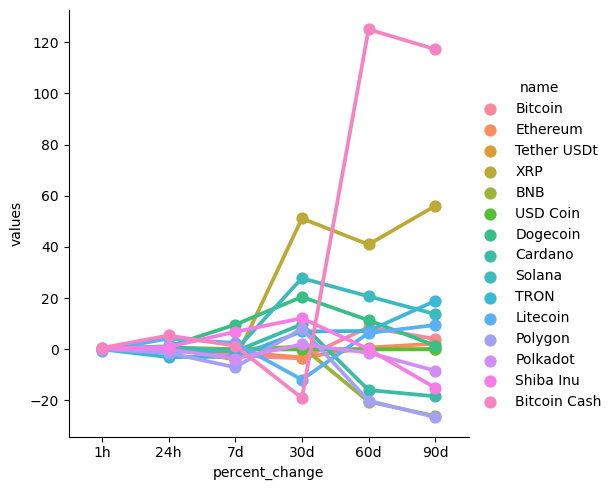

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')